# Exercise 2: AdaBoost

## Do not start the exercise until you fully understand the submission guidelines.


* The homework assignments are executed automatically.
* Failure to comply with the following instructions will result in a significant penalty.
* Appeals regarding your failure to read these instructions will be denied.
* Kindly reminder: the homework assignments contribute 60% of the final grade.


## Read the following instructions carefully:

1. This Jupyter notebook contains all the step-by-step instructions needed for this exercise.
1. Write **efficient**, **vectorized** code whenever possible. Some calculations in this exercise may take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deductions.
1. You are responsible for the correctness of your code and should add as many tests as you see fit to this jupyter notebook. Tests will not be graded nor checked.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/).
1. Your code must run without errors. Use at least `numpy` 1.15.4. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Submission includes a zip file that contains this notebook, with your ID as the file name. For example, `hw1_123456789_987654321.zip` if you submitted in pairs and `hw1_123456789.zip` if you submitted the exercise alone.
Please use only a **zip** file in your submission.

---
---

## Please sign that you have read and understood the instructions:

### *** 205985815 ***
### *** 806614 ***


---
---


In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pandas as pd

# your implementations
You may add new cells, write helper functions or test code as you see fit.
Please use this cell and include a description of your implementation.
Explain code design consideration, algorithmic choices and any other details you think is relevant to understanding your implementation

# PART 1 - AdaBoost Implementation

In [3]:
# Part 1: Implementing AdaBoost
class AdaBoostCustom:
    def __init__(self, T=10):
        self.T = T
        self.alphas = []
        self.models = []
        # Note: You may add more attributes

    def calculate_error(self, y, predictions, w):
        return np.sum(w * (predictions != y)) / np.sum(w)

    def calculate_alpha(self, err):
        return 0.5 * np.log((1 - err)/err)

    def update_weights(self, w, alpha, y, predictions):
        return w * np.exp(-alpha * (y * predictions))


    def fit(self, X, y):
        # a) Initialization
        # i) Initialize a zero model
        # ii)	Initialize the weights
        y = np.where(y == 0, -1, 1)
        w = np.ones(len(y)) * 1 / len(y)

        # b) Boosting loop:
        # i) Train a weighted decision stump
        for i in range(self.T):
          weak_learner = DecisionTreeClassifier(max_depth=1)
          weak_learner.fit(X, y, w)
          predictions = weak_learner.predict(X)

        # ii) Calculate the weighted classification error
          err = self.calculate_error(y, predictions, w)

        # iii) Find the optimal step size
          if err == 0:
            alpha = 1 # in case there is no error it means this crrent weak learner needs to have a say in prediction
          else:
            alpha = self.calculate_alpha(err)

        # iv) Update the ensemble model
          self.models.append(weak_learner)
          self.alphas.append(alpha)


        # v) Update the weights
          w = self.update_weights(w, alpha, y, predictions)
          w /= np.sum(w)

    def predict(self, X):
        Y = [self.alphas[idx] * model.predict(X)for idx, model in enumerate(self.models)]
        Y = np.sum(Y, axis=0)
        Y = np.sign(Y)
        Y = np.where(Y == -1, 0, 1)
        return Y

# generate test data

In [4]:
# Generate test dataset - change this to fit your needs
N = 200

X, y = make_classification(n_samples=N, n_features=2, n_informative=2,n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
learner = AdaBoostCustom(400)

In [6]:
learner.fit(X_train, y_train)

In [7]:
predictions = learner.predict(X_test)

# Test AdaBoost implementation
Demonstrate your AdaBoost implementation.
Add plots and figures if needed.
Please use this cell to describe your results and tests

Custom AdaBoost Accuracy: 0.825
Sklearn AdaBoost Accuracy: 0.85


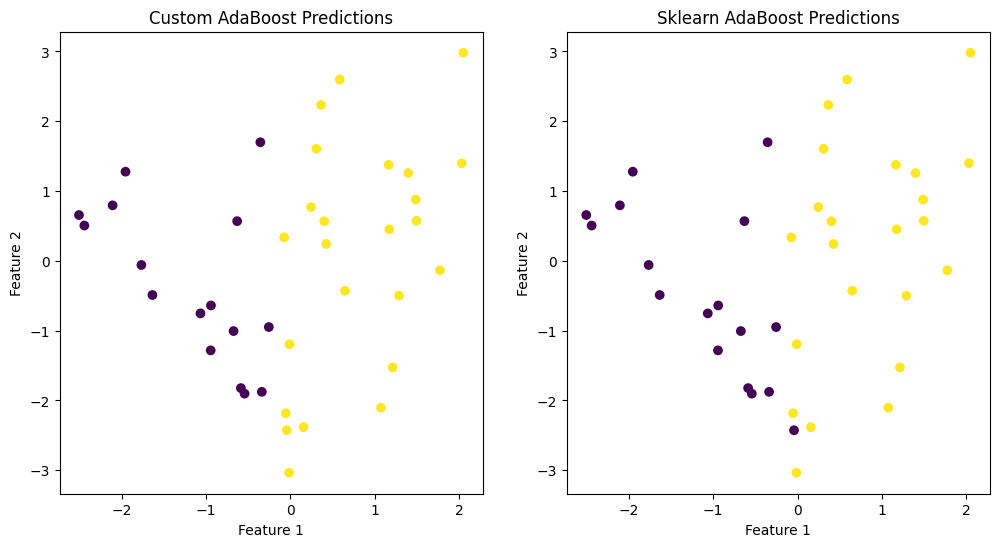

In [8]:
# Instantiate and train the AdaBoost model
custom_model = AdaBoostCustom(T=10)
custom_model.fit(X_train, y_train)

# Predictions and evaluation for custom AdaBoost
y_pred_custom = custom_model.predict(X_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)

# Instantiate and train the sklearn AdaBoost model
sklearn_model = AdaBoostClassifier(n_estimators=10, random_state=42)
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

y_pred_sklearn = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

# Print accuracies
print(f"Custom AdaBoost Accuracy: {custom_accuracy}")
print(f"Sklearn AdaBoost Accuracy: {sklearn_accuracy}")

# Plotting comparisons
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_custom)
plt.title('Custom AdaBoost Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn)
plt.title('Sklearn AdaBoost Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# PART 2 - Experiments
Describe the experiments you decided to perform and explain the logic behind your decision.
Generate the test data, perform the experiments and report the results.
Use plots, tables and other visualizations as you see fit.
You can use as many code and markdown cells you need for the presentation to be clear.

## Adaboost vs Logistic regression vs svm on linear data and imbalanced data (and also non-linear)

#### Create the data set

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Experiment 1 - linear
X_linear, y_linear = make_classification(n_samples=200, n_features=20, n_informative=12, n_redundant=0,
                                         n_clusters_per_class=1, class_sep=2.0, random_state=42, n_classes=7)

# Experiment 2 - imbalanced data followed this paper: https://www.hrpub.org/download/20210530/MS20-13491670.pdf
X_imbalanced, y_imbalanced = make_classification(n_samples=200, n_features=20, n_informative=12, n_redundant=0,
                                                 n_clusters_per_class=1, weights=[0.32, 0.35, 0.07, 0.06, 0.04, 0.13], random_state=42, n_classes=7)

# Experiment 3 - non-linear
X_non_linear, y_non_linear = make_classification(n_samples=200, n_features=20, n_informative=12, n_redundant=0,
                                                 n_clusters_per_class=1, flip_y=0.7, random_state=42, n_classes=7)

# Introduce non-linearity
X_non_linear[:, 1] = np.sin(X_non_linear[:, 1])

datasets = {
    'linear': (X_linear, y_linear),
    'imbalanced': (X_imbalanced, y_imbalanced),
    'non_linear': (X_non_linear, y_non_linear)
}


#### Data visualization plots using PCA

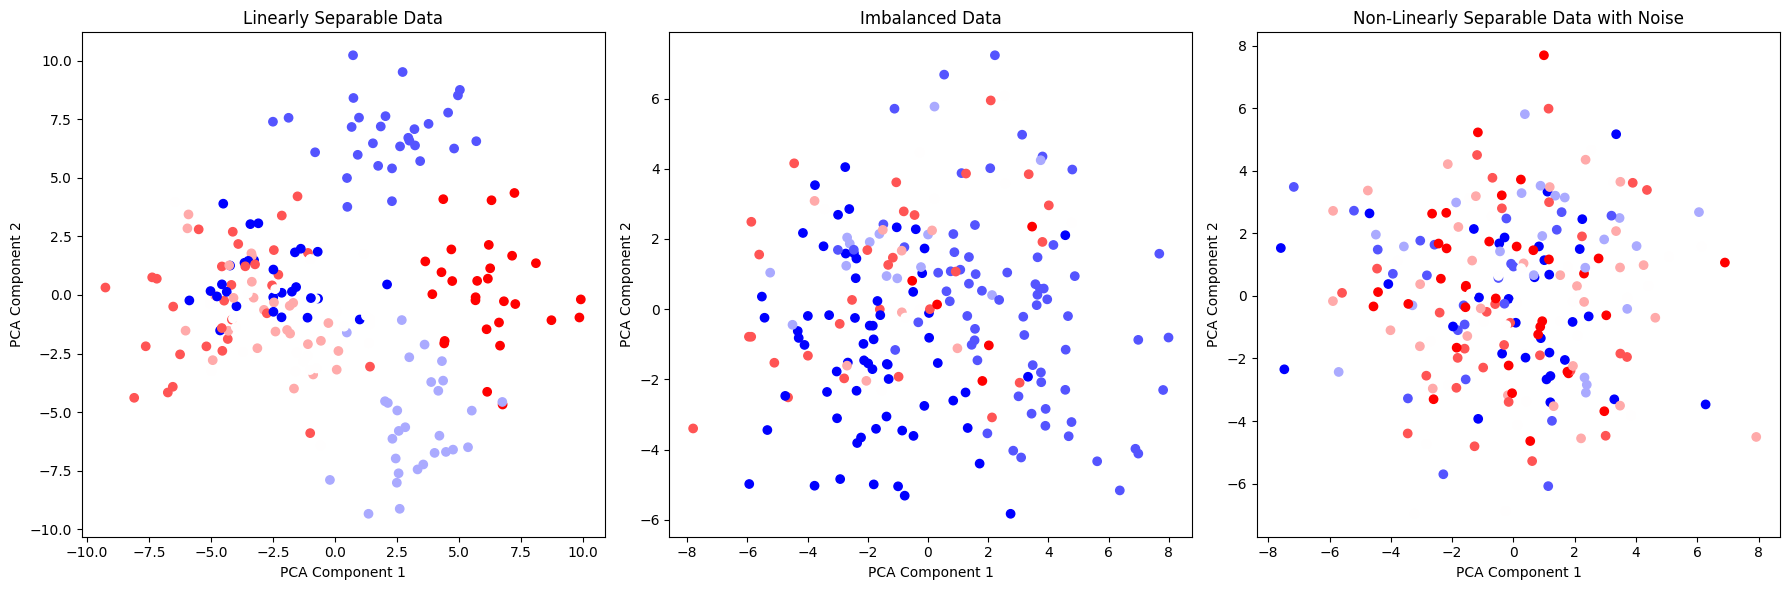

In [10]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_linear_2d = pca.fit_transform(X_linear)
X_imbalanced_2d = pca.fit_transform(X_imbalanced)
X_non_linear_2d = pca.fit_transform(X_non_linear)

# Plotting all three datasets in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X_linear_2d[:, 0], X_linear_2d[:, 1], c=y_linear, cmap='bwr')
axes[0].set_title('Linearly Separable Data')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

axes[1].scatter(X_imbalanced_2d[:, 0], X_imbalanced_2d[:, 1], c=y_imbalanced, cmap='bwr')
axes[1].set_title('Imbalanced Data')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

axes[2].scatter(X_non_linear_2d[:, 0], X_non_linear_2d[:, 1], c=y_non_linear, cmap='bwr')
axes[2].set_title('Non-Linearly Separable Data with Noise')
axes[2].set_xlabel('PCA Component 1')
axes[2].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

#### Utils

In [11]:
def train_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_report = classification_report(y_train, y_train_pred, output_dict=True, zero_division=1)
        test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=1)
        results[name] = {'train': train_report, 'test': test_report}
    return results

def results_to_dataframe(all_results):
    rows = []
    for dataset_name, results in all_results.items():
        for model_name, reports in results.items():
            for set_type, report in reports.items():
                rows.append({
                    'Dataset': dataset_name,
                    'Model': model_name,
                    'Set': set_type,
                    'Precision': report['weighted avg']['precision'],
                    'Recall': report['weighted avg']['recall'],
                    'F1-Score': report['weighted avg']['f1-score']
                })
    return pd.DataFrame(rows)

#### Initialize the models

In [12]:
adaboost = AdaBoostCustom(T=10)
log_reg = LogisticRegression(max_iter=2000)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

models = {'AdaBoost': adaboost, 'Logistic Regression': log_reg, 'XGBoost': xgboost}


#### Train and evaluate

In [13]:
all_results = {}

In [14]:
for dataset_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = train_evaluate(models, X_train, X_test, y_train, y_test)
    all_results[dataset_name] = results



results_df = results_to_dataframe(all_results)

#### Show result in table

In [15]:
imbalanced_test_results = results_df[(results_df['Dataset'] == 'imbalanced') & (results_df['Set'] == 'test')]
imbalanced_test_results

,Dataset,Model,Set,Precision,Recall,F1-Score
7,imbalanced,AdaBoost,test,0.688679,0.433333,0.323649
9,imbalanced,Logistic Regression,test,0.720476,0.683333,0.700314
11,imbalanced,XGBoost,test,0.634435,0.650000,0.634976


In [16]:
linear_test_results = results_df[(results_df['Dataset'] == 'linear') & (results_df['Set'] == 'test')]
linear_test_results

,Dataset,Model,Set,Precision,Recall,F1-Score
1,linear,AdaBoost,test,0.823684,0.200000,0.096418
3,linear,Logistic Regression,test,0.941085,0.933333,0.934407
5,linear,XGBoost,test,0.870860,0.850000,0.853857


In [17]:
non_linear_test_results = results_df[(results_df['Dataset'] == 'non_linear') & (results_df['Set'] == 'test')]
non_linear_test_results

,Dataset,Model,Set,Precision,Recall,F1-Score
13,non_linear,AdaBoost,test,0.923611,0.083333,0.012821
15,non_linear,Logistic Regression,test,0.222885,0.200000,0.201837
17,non_linear,XGBoost,test,0.090443,0.083333,0.086698


#### plot the results

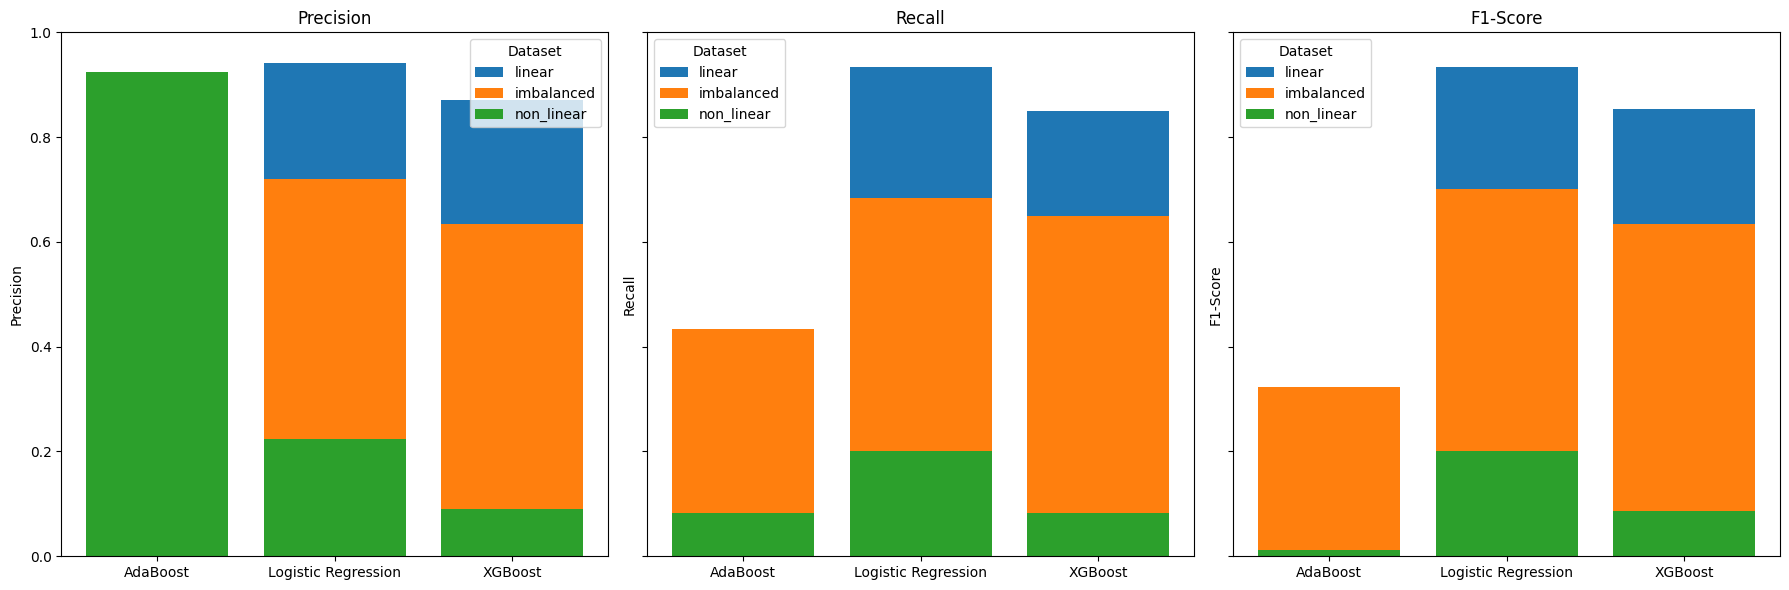

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, metric in enumerate(['Precision', 'Recall', 'F1-Score']):
    ax = axes[i]
    for dataset in results_df['Dataset'].unique():
        subset = results_df[results_df['Dataset'] == dataset]
        subset = subset[subset['Set'] == 'test']
        ax.bar(subset['Model'], subset[metric], label=dataset)
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric)
    ax.legend(title='Dataset')

plt.tight_layout()
plt.show()

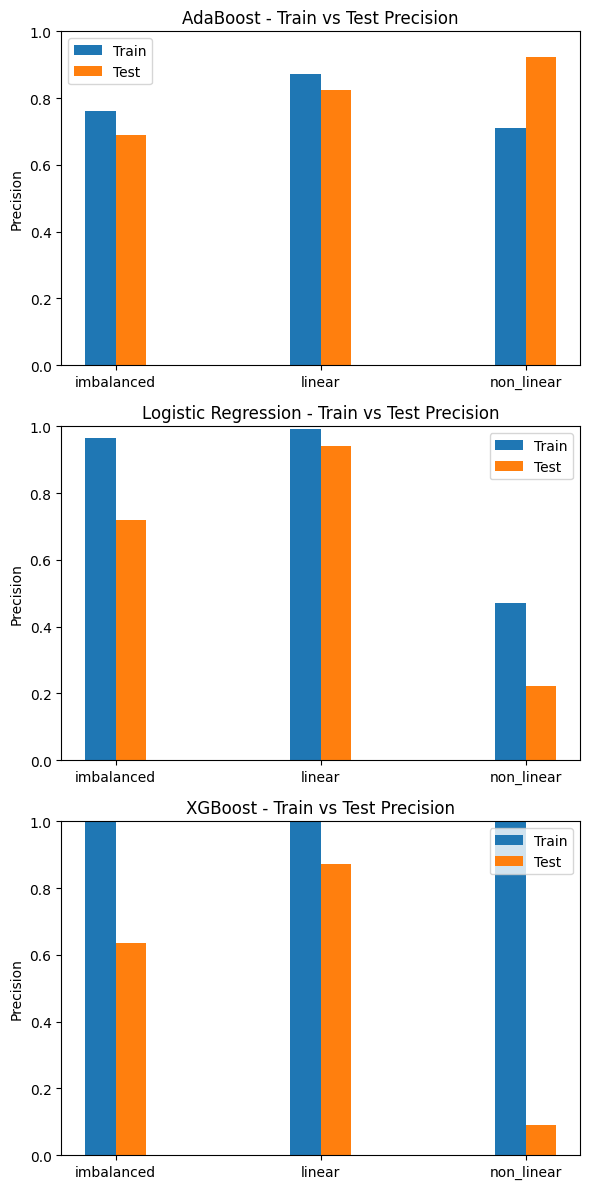

In [19]:
# Separate train vs test results for the second plot
train_test_results_df = results_df.pivot_table(index=['Dataset', 'Model'], columns='Set', values=['Precision', 'Recall', 'F1-Score']).reset_index()

fig, axes = plt.subplots(3, 1, figsize=(6, 12), sharey=True)

# Function to create grouped bar plots
def plot_grouped_bars(ax, model_data, model):
    bar_width = 0.15
    index = np.arange(len(model_data['Dataset']))

    train_precision = model_data[('Precision', 'train')]
    test_precision = model_data[('Precision', 'test')]

    bars1 = ax.bar(index, train_precision, bar_width, label='Train')
    bars2 = ax.bar(index + bar_width, test_precision, bar_width, label='Test')

    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(model_data['Dataset'])
    ax.set_title(f'{model} - Train vs Test Precision')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Precision')
    ax.legend()

for i, model in enumerate(train_test_results_df['Model'].unique()):
    ax = axes[i]
    model_data = train_test_results_df[train_test_results_df['Model'] == model]
    plot_grouped_bars(ax, model_data, model)

plt.tight_layout()
plt.show()


### Discussion

1. **Dataset Descriptions**
    * **Linearly Separable Data**: This dataset is designed such that the classes can be separated by a straight line, making it the simplest scenario for classification.
    * **Imbalanced Data**: This dataset has a significant class imbalance, with one class being much more frequent than the other, which is common in real-world scenarios and poses a challenge for classifiers.
    * **Non-Linearly Separable Data with Noise**: This dataset is more complex, with non-linear decision boundaries and added noise, making it difficult for models to achieve high performance.

2. **Motivation for Choosing This Dataset** ([Source](https://www.hrpub.org/download/20210530/MS20-13491670.pdf)):
    We chose to test the imbalanced dataset since, as mentioned in the source, it represents a real-world scenario. Standard classification algorithms are based on the assumption that the training set is balanced. Therefore, it is crucial to find a classifier that can handle imbalanced data for any given classification task. For the linear and non-linear datasets, we thought it would be interesting to see the results and benefits of each method on these types of datasets.

3. **Performance Analysis**

### Model Performance Comparison

| Model               | Linearly Separable | Imbalanced | Non-Linearly Separable |
|---------------------|---------------------|------------|------------------------|
| **AdaBoost**        | 0.823684            | 0.688679   | 0.923611               |
| **Logistic Regression** | 0.941085        | 0.720476   | 0.222885               |
| **XGBoost**         | 0.870860            | 0.634435   | 0.090443               |

#### Linearly Separable Data
All three models perform exceptionally well on the linearly separable dataset, with Logistic Regression achieving the highest precision, recall, and F1-score. This is expected as Logistic Regression is well-suited for linearly separable data. AdaBoost and XGBoost also show strong performance, but Logistic Regression has a slight edge.

#### Imbalanced Data
In the imbalanced dataset, the performance of all models drops compared to the linearly separable dataset. However, Logistic Regression still maintains the highest precision, recall, and F1-score. AdaBoost performs moderately, while XGBoost shows the lowest precision among the three. This suggests that Logistic Regression is more robust to class imbalance compared to the other two models.

#### Non-Linearly Separable Data with Noise
The non-linearly separable dataset with noise presents the greatest challenge for all models. AdaBoost shows the highest precision but suffers from very low recall, leading to a low F1-score. Logistic Regression and XGBoost perform poorly in terms of precision and recall, resulting in low F1-scores. This indicates that none of the models are particularly well-suited for this complex dataset without further tuning or modifications.

### Conclusion
The experiments reveal that Logistic Regression performs best on linearly separable and imbalanced datasets, while AdaBoost shows high precision but struggles with recall in the non-linear dataset. XGBoost's performance is generally lower across all datasets compared to the other two models. These results highlight the importance of selecting appropriate models and tuning them based on the specific characteristics of the dataset.
